In [38]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
#Drop month, day, and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
### Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0, 1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts() ## Not fire - 0, fire -1

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## Independent and dependent features
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [12]:
### Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(194, 11)

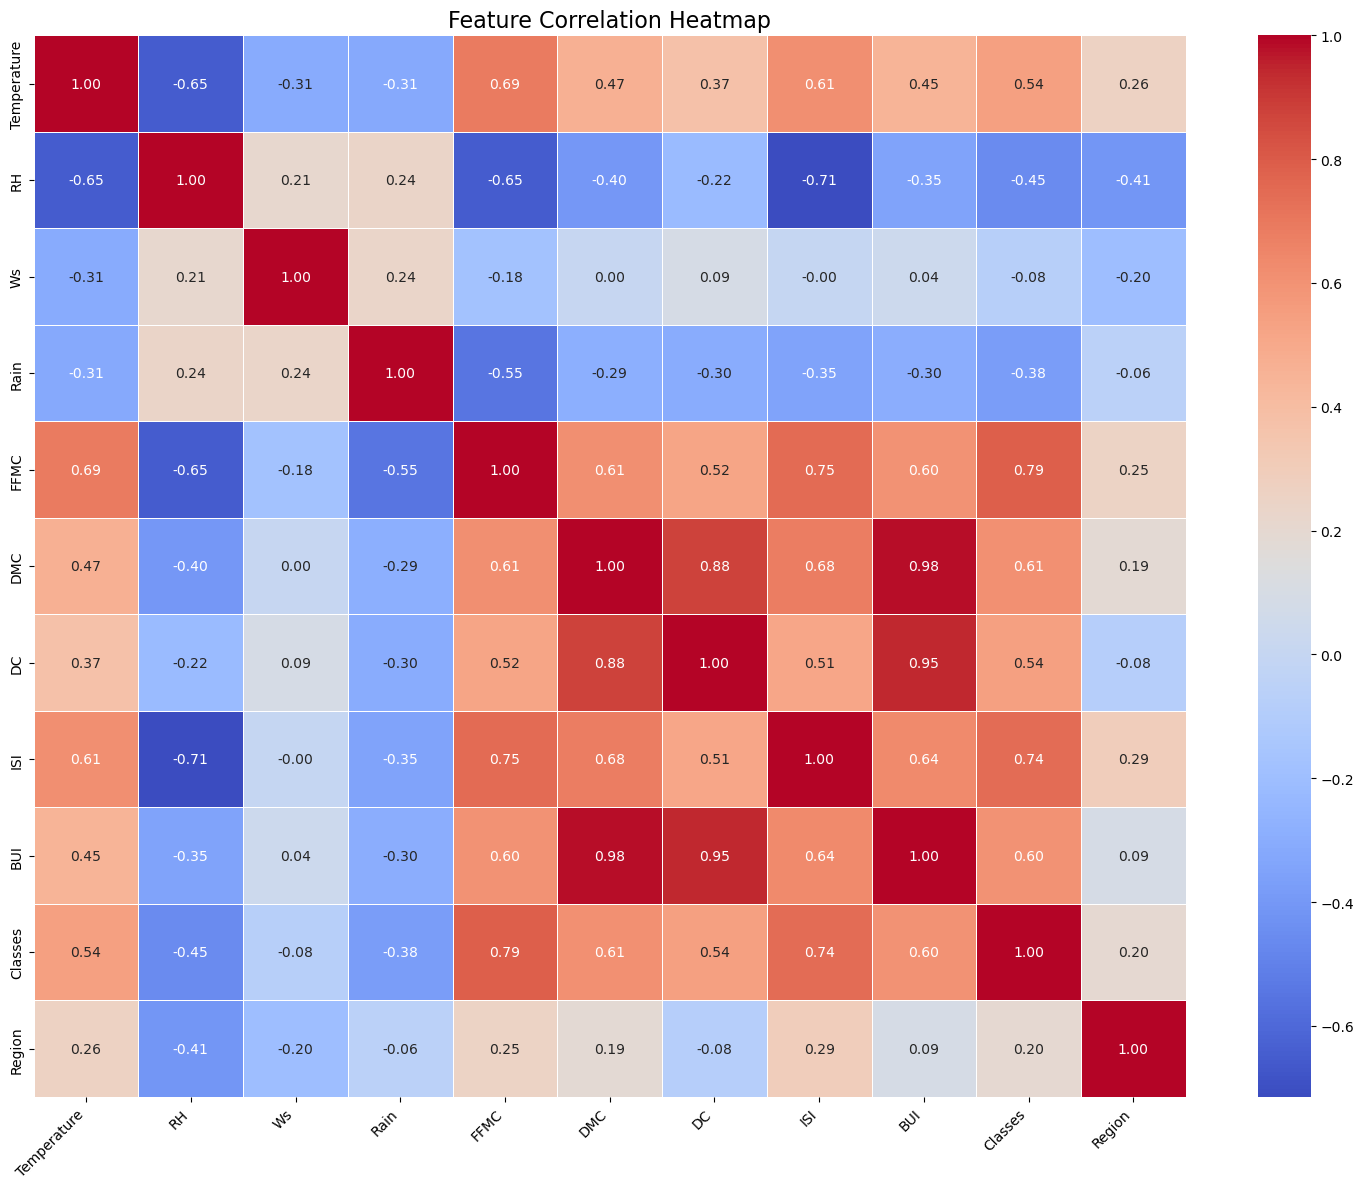

In [16]:
### Feature selection based on corr - multicollinearity 
plt.figure(figsize=(15, 12))  # Increase the figure size
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
# Set y-axis labels font size
plt.yticks(fontsize=10)
# Add a title for clarity
plt.title('Feature Correlation Heatmap', fontsize=16)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


In [25]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
## Set the threshold
corr_features = correlation(X_train, 0.85)

In [27]:
## Drop the features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [29]:
### Feature scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Box Plot')

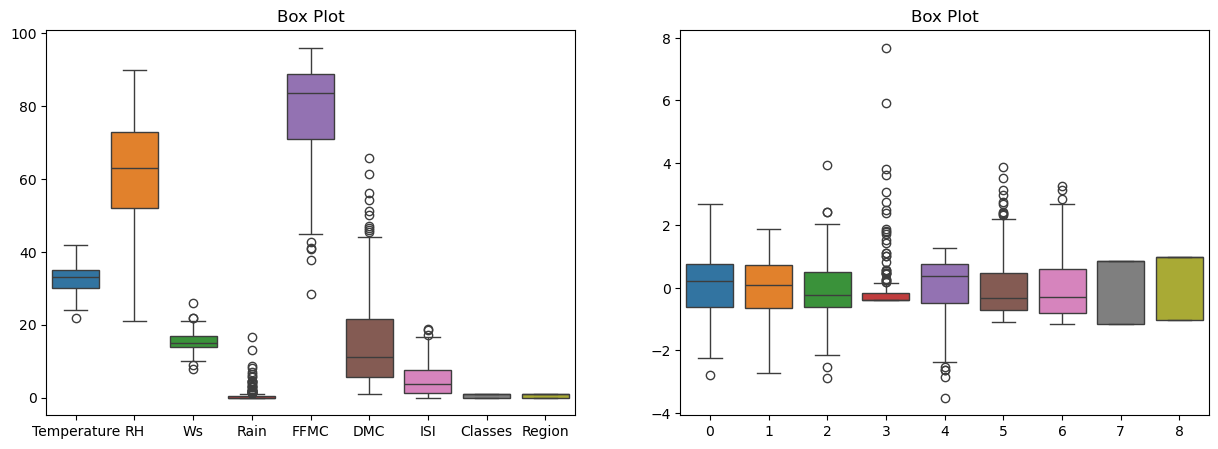

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Box Plot")

sns.boxplot(X_train_scaled, ax=axes[1])
axes[1].set_title("Box Plot")

Mean absolute error 0.5049978694165654
R2 Score 0.9805895859259883


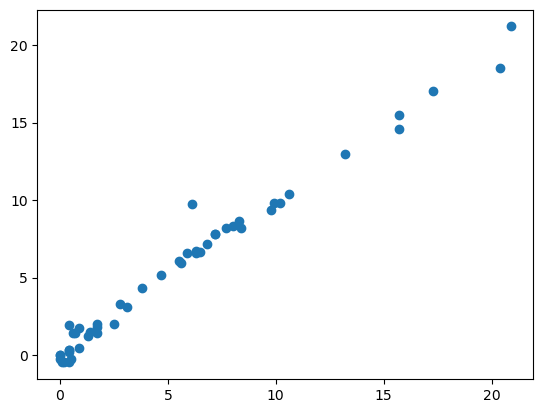

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 1.0093958923873405
R2 Score 0.9430507350726564


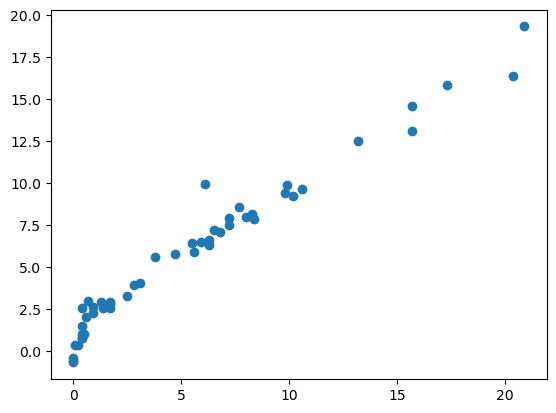

In [54]:
### Lasso Regression 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [55]:
#### Hyperparameter tuning
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv =5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

Mean absolute error 0.5556715031617876
R2 Score 0.9783282345203429


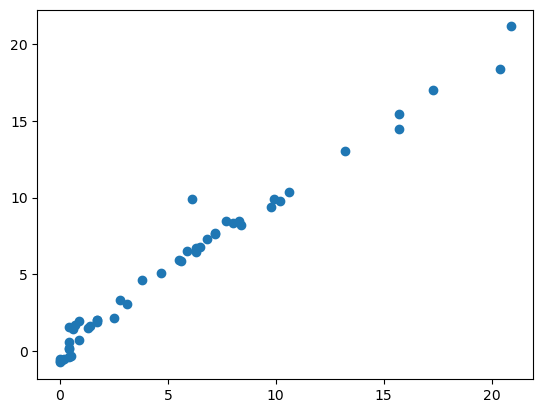

In [56]:
y_pred = lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 0.519204832584481
R2 Score 0.9801058063273599


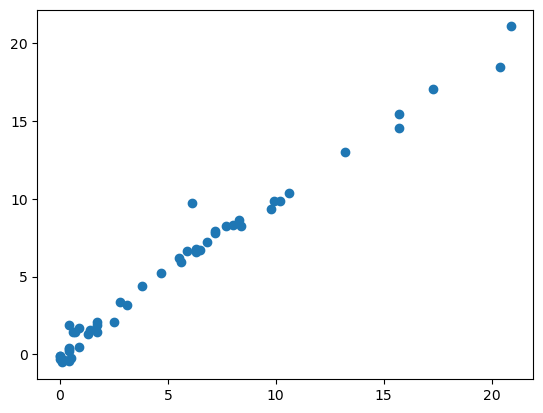

In [57]:
#### Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge = Ridge()
Ridge.fit(X_train_scaled, y_train)
y_pred = Ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [58]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

ridgecv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

Mean absolute error 0.6869262008277159
R2 Score 0.9722193780965623


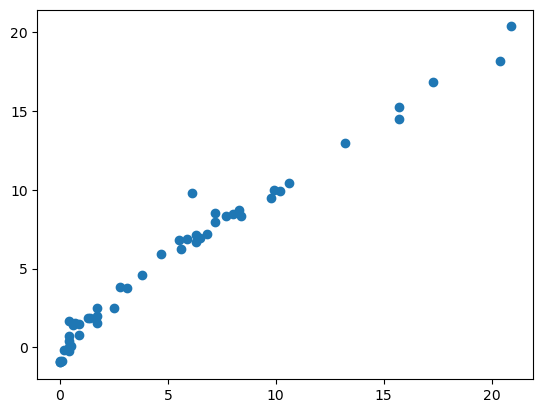

In [59]:
y_pred = ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 1.6834416340136709
R2 Score 0.8676961352267808


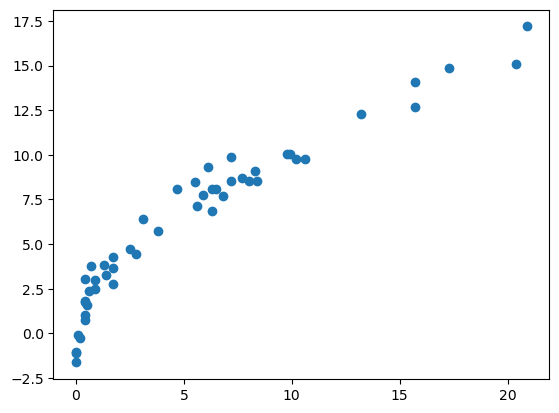

In [60]:
### Elastic net regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [61]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)

In [62]:
elasticnetcv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

Mean absolute error 0.5710147088777218
R2 Score 0.9781014571778188


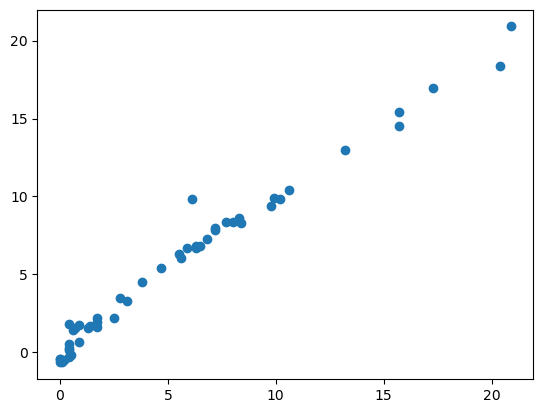

In [63]:
y_pred = elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [65]:
## Pickle the ml models: scaler, ridge
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(Ridge, open('ridge.pkl', 'wb'))